In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

from math   import sqrt
from typing import List

In [2]:
df_50   = pd.read_csv("data_50keV_local.csv")

In [3]:
df_50

,event_number,track_id,step_number,x,y,z,ux,uy,uz,angle,step_length,track_length,E_kin,E_dep
0,0,1,0,0.000,0.000,0.000,-0.933,0.297,0.203,0.000,0.000,0.000,50.000,0.000
1,0,1,2,-0.149,0.053,0.029,-0.160,0.969,-0.186,66.446,0.332,0.337,41.947,8.053
2,0,1,3,-0.159,0.113,0.018,-0.250,0.893,-0.374,65.009,0.081,0.417,37.191,1.802
3,0,1,4,-0.183,0.200,-0.018,0.242,0.942,-0.232,89.613,0.208,0.625,30.201,6.990
4,0,1,5,-0.167,0.266,-0.035,0.378,0.792,0.479,91.105,0.151,0.776,26.528,3.673
5,0,1,6,-0.145,0.311,-0.007,-0.782,-0.388,0.488,44.485,0.124,0.900,24.236,2.292
6,0,1,7,-0.184,0.292,0.017,-0.831,0.515,0.209,13.828,0.109,1.008,21.086,3.150
7,0,1,8,-0.216,0.312,0.025,-0.042,0.542,0.840,68.247,0.089,1.097,11.764,9.321
8,0,1,9,-0.217,0.321,0.039,0.425,-0.293,0.856,108.047,0.043,1.140,3.781,7.983
9,0,1,10,-0.216,0.320,0.041,0.383,-0.570,0.727,112.255,0.017,1.157,0.564,3.217


In [4]:
mask = df_50.track_id == 1
df_50 = df_50[mask]

In [5]:
dist_50 = pd.DataFrame({'xdist': df_50.groupby('event_number')['x'].max() - df_50.groupby('event_number')['x'].min(), 
                        'ydist': df_50.groupby('event_number')['y'].max() - df_50.groupby('event_number')['y'].min(), 
                        'zdist': df_50.groupby('event_number')['z'].max() - df_50.groupby('event_number')['z'].min()})

In [6]:
def diagonal(row):
    return sqrt(row['xdist']**2 + row['ydist']**2 + row['zdist']**2)

Text(0.5, 0, 'Diagonal (mm)')

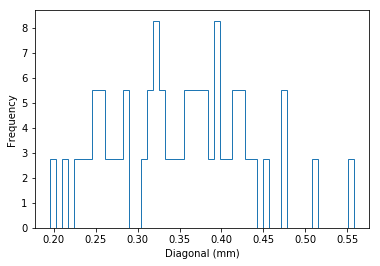

In [7]:
dist_50['diag'] = dist_50.apply(diagonal, axis=1)
dist_50['diag'].plot.hist(bins=50, histtype='step', density=True, )
plt.xlabel('Diagonal (mm)')

In [11]:
df_50_nolim   = pd.read_csv("data/data_50keV_nolim_local.csv")

In [12]:
mask = df_50_nolim.track_id == 1
df_50_nolim = df_50_nolim[mask]

In [13]:
dist_50_nolim = pd.DataFrame({'xdist': df_50_nolim.groupby('event_number')['x'].max() - df_50_nolim.groupby('event_number')['x'].min(), 
                              'ydist': df_50_nolim.groupby('event_number')['y'].max() - df_50_nolim.groupby('event_number')['y'].min(), 
                              'zdist': df_50_nolim.groupby('event_number')['z'].max() - df_50_nolim.groupby('event_number')['z'].min()})

Text(0.5, 0, 'Diagonal (mm)')

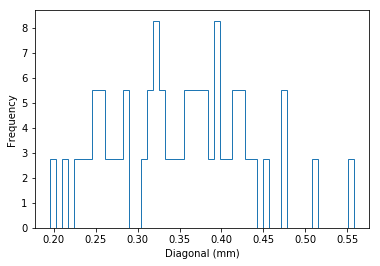

In [14]:
dist_50_nolim['diag'] = dist_50_nolim.apply(diagonal, axis=1)
dist_50_nolim['diag'].plot.hist(bins=50, histtype='step', density=True, )
plt.xlabel('Diagonal (mm)')